In [62]:
import pandas as pd
import numpy as np

In [63]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
df = pd.read_csv("AirPassengers (2).csv")

In [65]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [66]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [67]:
df.shape

(144, 2)

In [68]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [69]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [70]:
df["date"] = pd.date_range(start='1949-01',end='1961-01',freq='M')

In [71]:
df.head()

,Month,#Passengers,date
0,1949-01,112,1949-01-31
1,1949-02,118,1949-02-28
2,1949-03,132,1949-03-31
3,1949-04,129,1949-04-30
4,1949-05,121,1949-05-31


In [72]:
df.head()

,Month,#Passengers,date
0,1949-01,112,1949-01-31
1,1949-02,118,1949-02-28
2,1949-03,132,1949-03-31
3,1949-04,129,1949-04-30
4,1949-05,121,1949-05-31


In [73]:
df = pd.read_csv('AirPassengers (2).csv',parse_dates=[0],index_col='Month')

In [74]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [75]:
df.rename(columns={'#Passengers':'Passengers'},inplace=True)

In [76]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


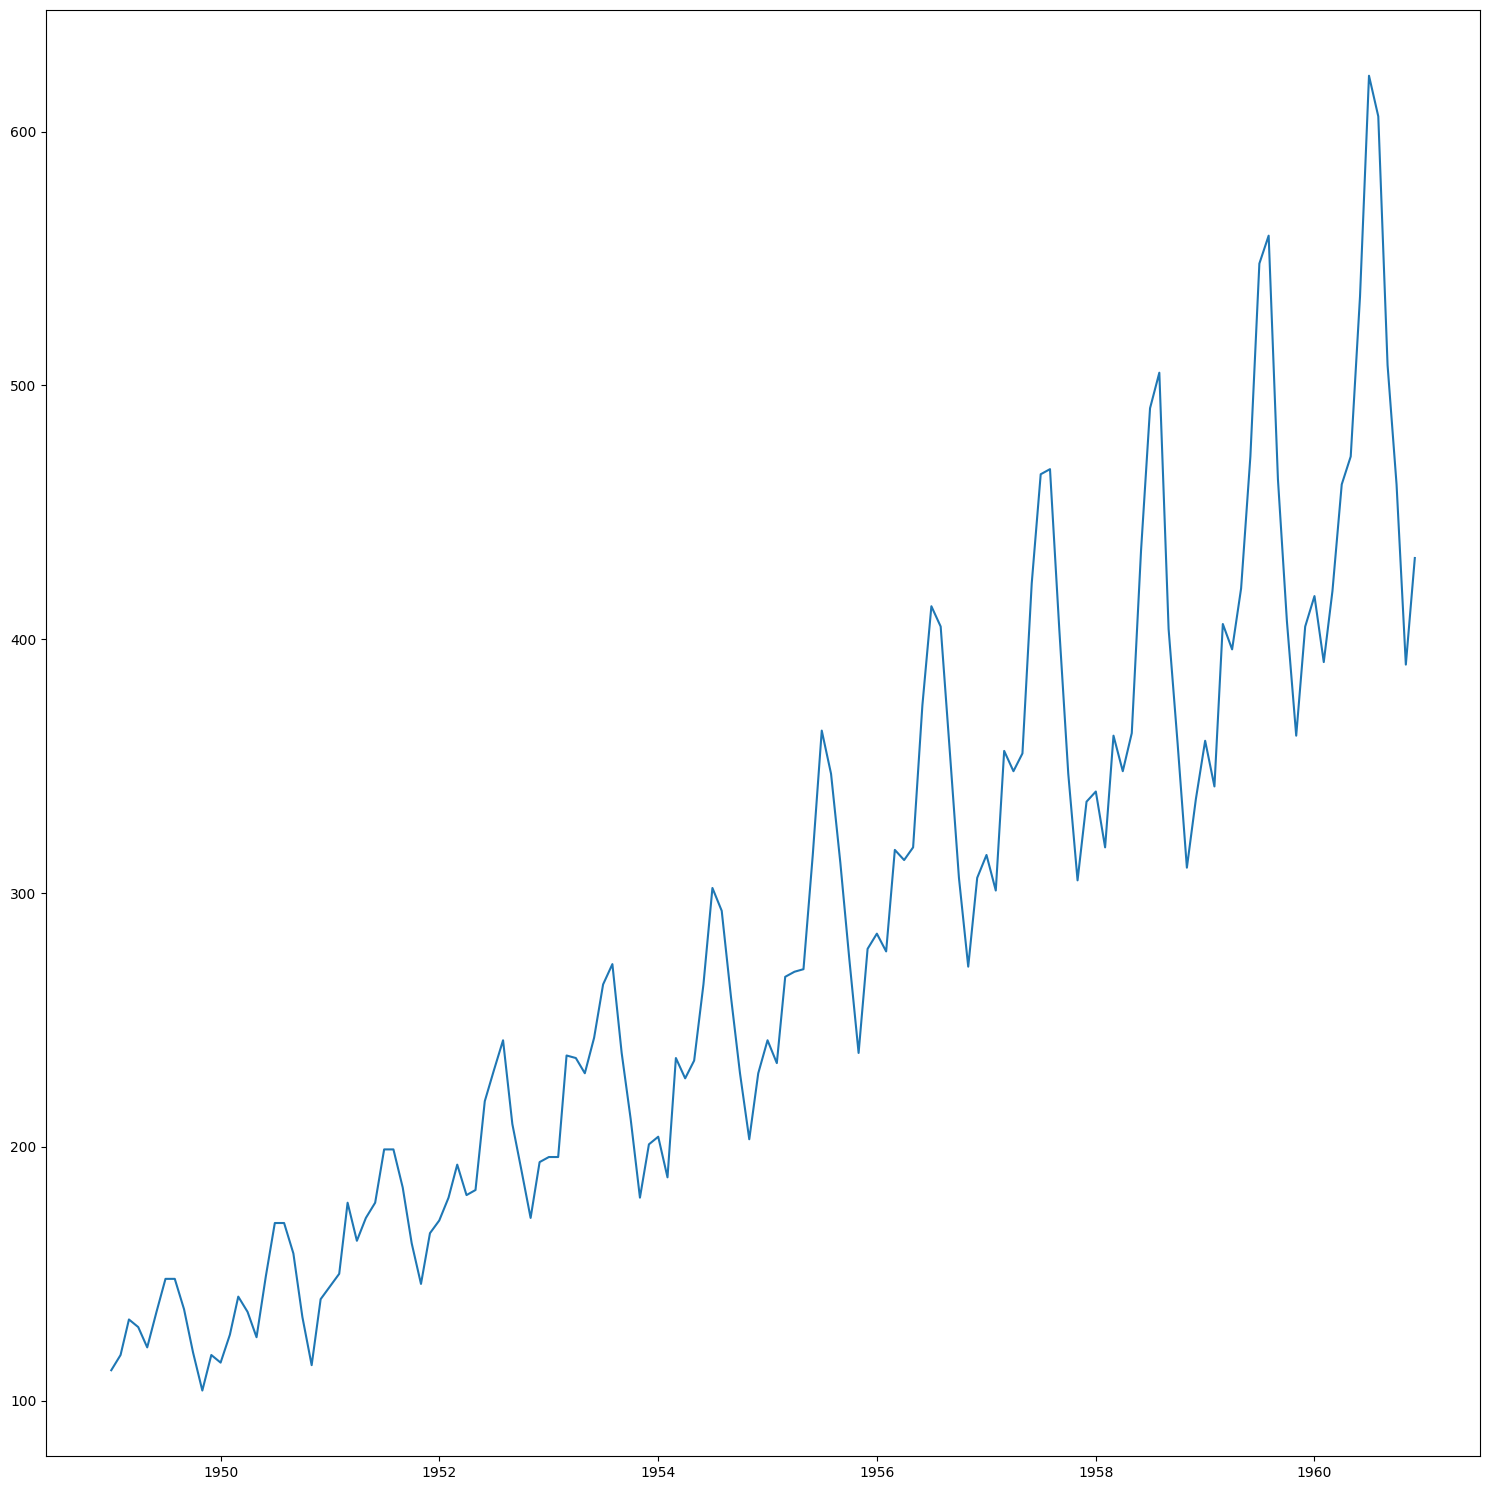

In [77]:
# EDA
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15),facecolor='white')
plt.plot(df)
plt.tight_layout()
plt.show()

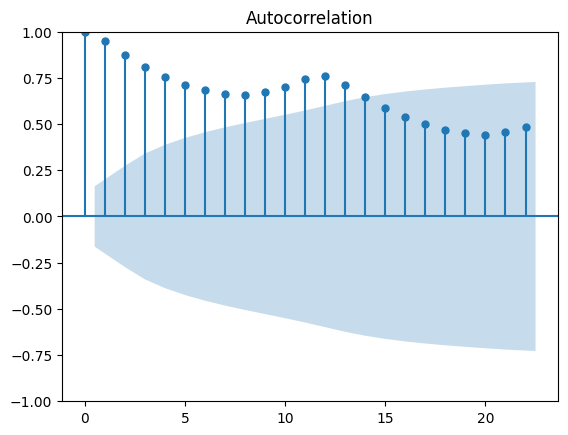

In [78]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)
plt.show()
# this plot is not stationarity plot so go to convert to stationarity

In [79]:
# convert to non stationary to stationary

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['Passengers'],autolag='AIC')
print('1.adf:',dftest[0])
print('2.p-value:',dftest[1])
print('3.num of lags: ',dftest[2])
print('4.num of observation used for ADF regression and critical values calculation:',dftest[3])
print('5.critical values: ')
for key,val in dftest[4].items():
    print("\t",key,":",val)

1.adf: 0.8153688792060528
2.p-value: 0.9918802434376411
3.num of lags:  13
4.num of observation used for ADF regression and critical values calculation: 130
5.critical values: 
	 1% : -3.4816817173418295
	 5% : -2.8840418343195267
	 10% : -2.578770059171598


In [80]:
df1 = df.diff(periods=1)

In [81]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [82]:
df1

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [83]:
df2 = df1.iloc[1:]
df2

,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


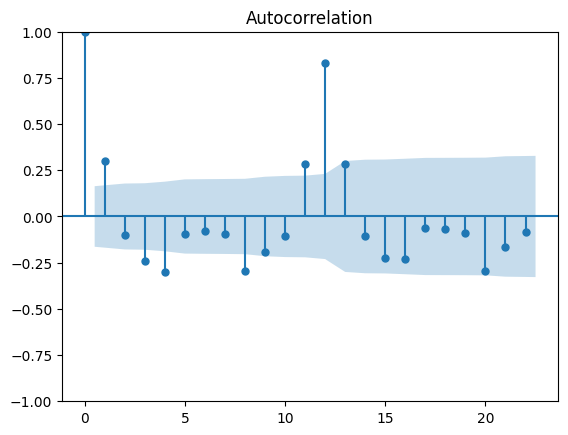

In [84]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df2)
plt.show()

In [85]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df2['Passengers'],autolag='AIC')
print('1.adf:',dftest[0])
print('2.p-value:',dftest[1])
print('3.num of lags: ',dftest[2])
print('4.num of observation used for ADF regression and critical values calculation:',dftest[3])
print('5.critical values: ')
for key,val in dftest[4].items():
    print("\t",key,":",val)

1.adf: -2.829266824169999
2.p-value: 0.05421329028382552
3.num of lags:  12
4.num of observation used for ADF regression and critical values calculation: 130
5.critical values: 
	 1% : -3.4816817173418295
	 5% : -2.8840418343195267
	 10% : -2.578770059171598


In [86]:
df3 = df2.diff(periods=1)

In [87]:
df3

,Passengers
Month,
1949-02-01,NaN
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
...,...
1960-08-01,-103.0
1960-09-01,-82.0
1960-10-01,51.0


In [88]:
df4 = df3.iloc[1:]
df4

,Passengers
Month,
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
1949-07-01,-1.0
...,...
1960-08-01,-103.0
1960-09-01,-82.0
1960-10-01,51.0


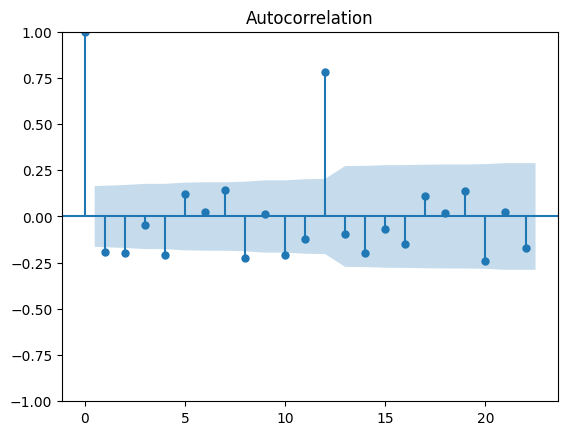

In [89]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df4)
plt.show()

In [90]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df4['Passengers'],autolag='AIC')
print('1.adf:',dftest[0])
print('2.p-value:',dftest[1])
print('3.num of lags: ',dftest[2])
print('4.num of observation used for ADF regression and critical values calculation:',dftest[3])
print('5.critical values: ')
for key,val in dftest[4].items():
    print("\t",key,":",val)

1.adf: -16.38423154246854
2.p-value: 2.7328918500140445e-29
3.num of lags:  11
4.num of observation used for ADF regression and critical values calculation: 130
5.critical values: 
	 1% : -3.4816817173418295
	 5% : -2.8840418343195267
	 10% : -2.578770059171598


In [91]:
df4.shape

(142, 1)

In [92]:
train = df4[:100]
test = df4[100:]

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1949-03-01 to 1957-06-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [94]:
from statsmodels.tsa.ar_model import AutoReg

In [95]:
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(df2,maxlag=15,glob=True)
mod.ar_lags

[1, 8, 12, 13]

In [96]:
ar_model = AutoReg(train,lags=[1, 8, 12, 13])
ar_model_fit = ar_model.fit()

In [97]:
ar_model_fit

In [98]:
pred = ar_model_fit.predict(start=100,end=141)

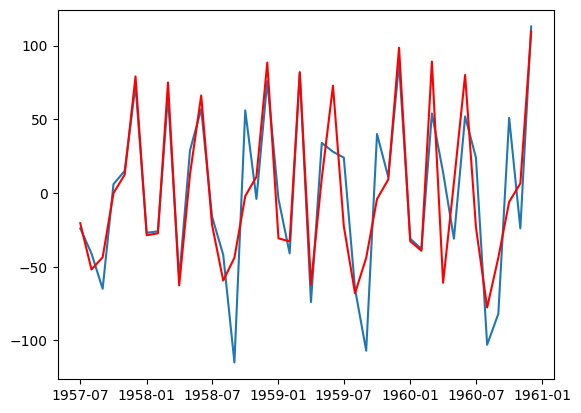

In [99]:
plt.plot(test)
plt.plot(pred,color='red')

In [100]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# rmse(test,pred)
mean_squared_error(test,pred)

942.2719617054489

In [101]:
test.shape

(42, 1)

In [102]:
pred.shape

(42,)

In [103]:
# ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train,order=(5,9,2))
model_arima_fit = model_arima.fit()

In [104]:
print(model_arima_fit.aic)

16.0


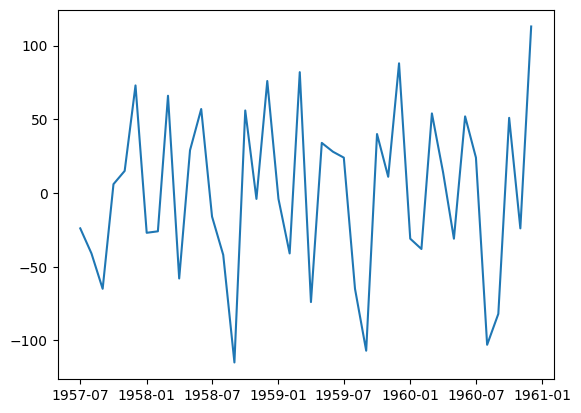

In [105]:
prediction = model_arima_fit.forecast(steps=42)
plt.plot(test[:42])


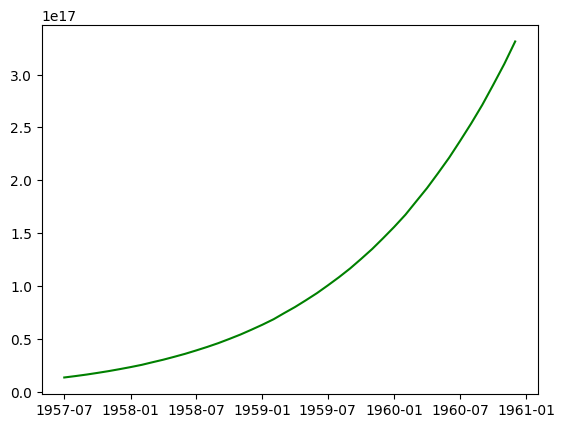

In [106]:
plt.plot(prediction,color='green')

In [108]:
from sklearn.metrics import mean_squared_error,accuracy_score
prediction = model_arima_fit.forecast(steps=42)

print(mean_squared_error(test,prediction))
print(accuracy_score(test,prediction))


2.017573088068292e+34
0.0
